In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In /home/u207550/.conda/envs/machinelearningintel/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/u207550/.conda/envs/machinelearningintel/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/u207550/.conda/envs/machinelearningintel/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/u207550/.conda/envs/machinelearningintel/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will b

In [3]:
car_df=pd.read_csv("CarPrice_Assignment.csv")

In [4]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
car_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
car_df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


<AxesSubplot:xlabel='CarName'>

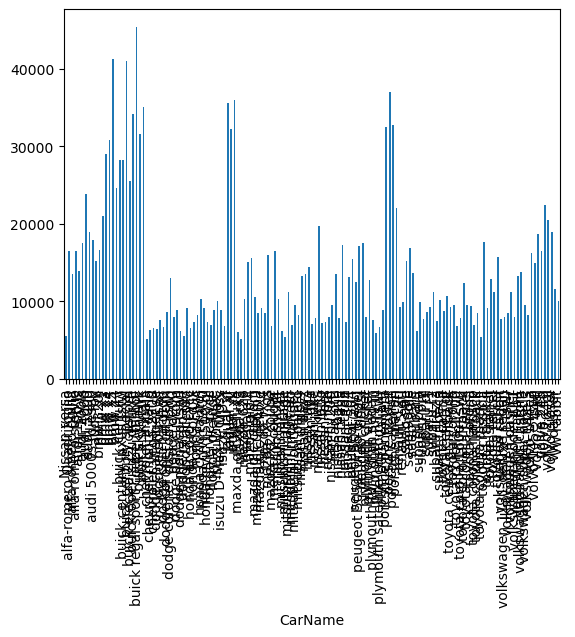

In [7]:
car_df.groupby("CarName")["price"].mean().plot.bar()

In [8]:
car_df["fueltype"].value_counts()

fueltype
gas       185
diesel     20
Name: count, dtype: int64

In [9]:
car_df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [10]:
car_df.drop(columns=["CarName"],inplace=True)

In [11]:
num_columns=car_df.select_dtypes(include=["int64","float64"])

In [12]:
len(car_df.select_dtypes(include=["int64","float64"]).columns)

16

In [13]:
corr_matrix=num_columns.corr()
print(corr_matrix.shape)

(16, 16)


In [14]:
corr_matrix

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


<AxesSubplot:>

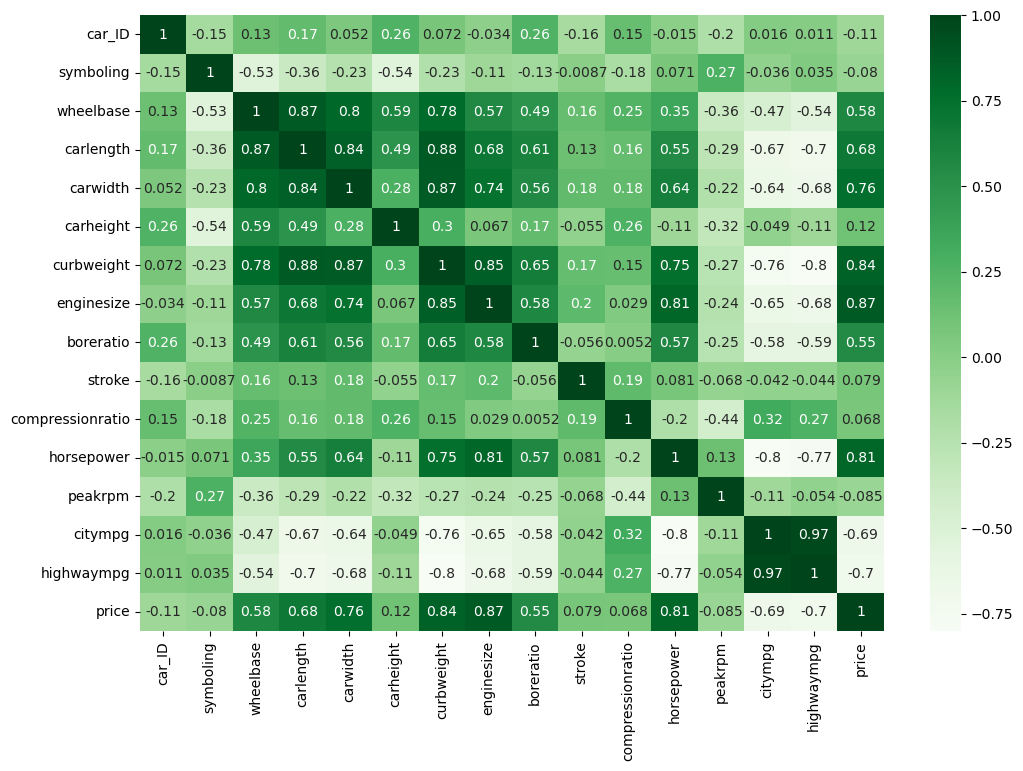

In [15]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,annot=True,cmap="Greens")

In [17]:
imp_cols=['wheelbase','carlength','carwidth','curbweight','boreratio','horsepower','citympg','highwaympg','price']
imp_cols

['wheelbase',
 'carlength',
 'carwidth',
 'curbweight',
 'boreratio',
 'horsepower',
 'citympg',
 'highwaympg',
 'price']

In [18]:
training_data=car_df[imp_cols]
training_data

,wheelbase,carlength,carwidth,curbweight,boreratio,horsepower,citympg,highwaympg,price
0,88.6,168.8,64.1,2548,3.47,111,21,27,13495.0
1,88.6,168.8,64.1,2548,3.47,111,21,27,16500.0
2,94.5,171.2,65.5,2823,2.68,154,19,26,16500.0
3,99.8,176.6,66.2,2337,3.19,102,24,30,13950.0
4,99.4,176.6,66.4,2824,3.19,115,18,22,17450.0
...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,2952,3.78,114,23,28,16845.0
201,109.1,188.8,68.8,3049,3.78,160,19,25,19045.0
202,109.1,188.8,68.9,3012,3.58,134,18,23,21485.0
203,109.1,188.8,68.9,3217,3.01,106,26,27,22470.0


In [19]:
x=training_data.drop(columns=["price"])
y=training_data["price"]

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=50)

In [21]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143 entries, 77 to 176
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   wheelbase   143 non-null    float64
 1   carlength   143 non-null    float64
 2   carwidth    143 non-null    float64
 3   curbweight  143 non-null    int64  
 4   boreratio   143 non-null    float64
 5   horsepower  143 non-null    int64  
 6   citympg     143 non-null    int64  
 7   highwaympg  143 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 10.1 KB


In [22]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(143, 8)
(62, 8)
(143,)
(62,)


In [23]:
LR=LinearRegression()

In [24]:
LR.fit(x_train,y_train)

/home/u207550/.conda/envs/machinelearningintel/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/u207550/.conda/envs/machinelearningintel/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/u207550/.conda/envs/machinelearningintel/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/u207550/.conda/envs/machinelearningintel/lib/python3.9/site-packages/sklearn/utils/validation.py:605: Future

LinearRegression()

In [25]:
y_pred=LR.predict(x_test)

/home/u207550/.conda/envs/machinelearningintel/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/u207550/.conda/envs/machinelearningintel/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/u207550/.conda/envs/machinelearningintel/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [26]:
list(zip(y_test,y_pred))

[(16695.0, 18249.35753348426),
 (11199.0, 14680.70347386568),
 (20970.0, 14958.787508742782),
 (40960.0, 32111.985662343766),
 (11259.0, 13060.308245452805),
 (6575.0, 6628.563543174256),
 (11900.0, 16903.008646342583),
 (23875.0, 22042.276287262604),
 (8845.0, 9215.948255577656),
 (5499.0, 4936.077402927207),
 (12629.0, 18316.257762990208),
 (8238.0, 6940.894144821046),
 (28176.0, 24114.172655101982),
 (9298.0, 10756.768138959167),
 (6692.0, 6496.959963122143),
 (9549.0, 10450.466912202945),
 (15510.0, 13952.525848465928),
 (7957.0, 9747.32084609021),
 (9279.0, 12642.13591187739),
 (13845.0, 11516.192804557322),
 (7999.0, 5538.34967211941),
 (14869.0, 18994.302245678322),
 (6229.0, 6326.475871583556),
 (15998.0, 21935.611442972702),
 (5118.0, 6558.3491357995445),
 (16845.0, 18480.68859915767),
 (13200.0, 19062.939668453444),
 (7129.0, 7734.883682652078),
 (8249.0, 6259.403960230673),
 (9639.0, 13572.556878864896),
 (12764.0, 18196.12672620223),
 (8358.0, 6882.986203581793),
 (5389.0, 

In [27]:
mean_absolute_error(y_test,y_pred)

/home/u207550/.conda/envs/machinelearningintel/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/u207550/.conda/envs/machinelearningintel/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


2946.765743818713

In [28]:
#split the data into training and testing set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=50)

In [29]:
#choose the algorithm
from sklearn.linear_model import LinearRegression


In [30]:
#initilasize the model with default the model
LR=LinearRegression()

In [31]:
#train the model
LR.fit(x_train,y_train)

/home/u207550/.conda/envs/machinelearningintel/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/u207550/.conda/envs/machinelearningintel/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/u207550/.conda/envs/machinelearningintel/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/u207550/.conda/envs/machinelearningintel/lib/python3.9/site-packages/sklearn/utils/validation.py:605: Future

LinearRegression()

In [32]:
#predict price of any two houses
#predict sale price for any two houses
any_two_house_input=x_test[2:4]
any_two_house_input.head()

,wheelbase,carlength,carwidth,curbweight,boreratio,horsepower,citympg,highwaympg
12,101.2,176.8,64.8,2710,3.31,121,21,28
73,120.9,208.1,71.7,3900,3.80,184,14,16


In [33]:
#select the actual price of these two house
real_prices=y_test[2:4]
print(real_prices)

12    20970.0
73    40960.0
Name: price, dtype: float64


In [34]:
#predict the prices of these two houses
predicted_price=LR.predict(any_two_house_input)
print(predicted_price)

[14958.78750874 32111.98566234]


/home/u207550/.conda/envs/machinelearningintel/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/u207550/.conda/envs/machinelearningintel/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/u207550/.conda/envs/machinelearningintel/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [35]:
###performance of model
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error

In [ ]:
#prediction of training data